In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read dataset

In [3]:
app_df = pd.read_csv('application_data.csv', encoding='cp1252')
pre_df = pd.read_csv('previous_application.csv')
des_df = pd.read_csv('columns_description.csv',  encoding='cp1252')

## Clean data

### View dataset and drop unnecessary columns

In [4]:
pre_df.shape

(1670214, 37)

In [5]:
app_df.shape

(307511, 122)

In [6]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


In [7]:
pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,...,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,...,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,...,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,...,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,...,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# drop unnecessary columns from 2 dataset
app_df_2 = app_df.drop(columns=[
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'APARTMENTS_AVG',
    'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG',
    'COMMONAREA_AVG',
    'ELEVATORS_AVG',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',
    'LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG',
    'APARTMENTS_MODE',
    'BASEMENTAREA_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE',
    'COMMONAREA_MODE',
    'ELEVATORS_MODE',
    'ENTRANCES_MODE',
    'FLOORSMAX_MODE',
    'FLOORSMIN_MODE',
    'LANDAREA_MODE',
    'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI',
    'COMMONAREA_MEDI',
    'ELEVATORS_MEDI',
    'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI',
    'FLOORSMIN_MEDI',
    'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_MEDI',
    'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE',
    'TOTALAREA_MODE',
    'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR', ])



In [9]:
pre_df_2 = pre_df.drop(columns=['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'RATE_INTEREST_PRIVILEGED', 
                                'RATE_INTEREST_PRIMARY', 'RATE_DOWN_PAYMENT', 'FLAG_LAST_APPL_PER_CONTRACT', 'AMT_GOODS_PRICE',
                                'AMT_DOWN_PAYMENT', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'NAME_TYPE_SUITE', 
                                'NAME_GOODS_CATEGORY', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 
                                'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
                                'DAYS_LAST_DUE','DAYS_TERMINATION'])

In [10]:
pre_df_2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,XAP,Approved,Cash through the bank,XAP,Repeater,POS,XNA,Country-wide,middle,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,XNA,Approved,XNA,XAP,Repeater,Cash,x-sell,Contact center,low_action,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,XNA,Approved,Cash through the bank,XAP,Repeater,Cash,x-sell,Credit and cash offices,high,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,XNA,Approved,Cash through the bank,XAP,Repeater,Cash,x-sell,Credit and cash offices,middle,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,Repairs,Refused,Cash through the bank,HC,Repeater,Cash,walk-in,Credit and cash offices,high,NaN


In [11]:
app_df_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,1,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,2,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,...,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,2,THURSDAY,11,0,0,0,0,1,1,Religion


In [12]:
# Check colums and data type 
app_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

handling missing values in AMT_ANNUITY column.

AMT_GOODS_PRICE   
NAME_TYPE_SUITE   
OWN_CAR_AGE 
OCCUPATION_TYPE   
CNT_FAM_MEMBERS 


### map with previous application status 

In [13]:
# 1 current application has more than one previous application,
# therefore, we need calculate before merge 2 dataframes
status_stats = pd.pivot_table(pre_df, values= 'SK_ID_PREV',
                              index= ['SK_ID_CURR'],
                              columns= ['NAME_CONTRACT_STATUS'],
                              aggfunc= lambda x: len(x.unique()))

In [14]:
status_stats.reset_index(inplace=True)

In [15]:
status_stats.replace(np.nan, 0, inplace=True)

In [16]:
status_stats

NAME_CONTRACT_STATUS,SK_ID_CURR,Approved,Canceled,Refused,Unused offer
0,100001,1.00,0.00,0.00,0.00
1,100002,1.00,0.00,0.00,0.00
2,100003,3.00,0.00,0.00,0.00
3,100004,1.00,0.00,0.00,0.00
4,100005,1.00,1.00,0.00,0.00
...,...,...,...,...,...
338852,456251,1.00,0.00,0.00,0.00
338853,456252,1.00,0.00,0.00,0.00
338854,456253,2.00,0.00,0.00,0.00
338855,456254,2.00,0.00,0.00,0.00


In [17]:
app_df_2 = pd.merge(app_df_2, status_stats,
                   how='left',
                   left_on='SK_ID_CURR',
                   right_on='SK_ID_CURR')

In [18]:
app_df_2.shape

(307511, 45)

### checking column missing values

In [19]:
#count the missing values
app_df_2.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

### handling missing values

In [20]:
#calculate the percentage of missing values in AMT_ANNUITY column.
12/307511*100

0.003902299429939092

In [21]:
# drop records with AMT_ANNUITY missing
app_df_2 = app_df_2[~app_df_2['AMT_ANNUITY'].isnull()]

In [22]:
#calculate the percentage of missing values in AMT_GOODS_PRICE column.
278/307511*100

0.09040327012692229

In [23]:
# drop records with AMT_GOODS_PRICE missing
app_df_2 = app_df_2[~app_df_2['AMT_GOODS_PRICE'].isnull()]

In [24]:
#calculate the percentage of missing values in NAME_TYPE_SUITE column.
1292/307511*100

0.42014757195677555

In [25]:
# drop records with NAME_TYPE_SUITE missing
app_df_2 = app_df_2[~app_df_2['NAME_TYPE_SUITE'].isnull()]

In [26]:
#calculate the percentage of missing values in OWN_CAR_AGE column.
202929/307511*100

65.9908100848425

In [27]:
# The values of column OWN_CAR_AGE is missing at more than 66%, this is Missing not at random (MNAR)
# Age of client's car - mean 66% of customers do not own car.
# replace the missing values with 0.
app_df_2['OWN_CAR_AGE'] = app_df_2['OWN_CAR_AGE'].replace(np.nan, 0)

In [28]:
#calculate the percentage of missing values in OCCUPATION_TYPE column.
96006/307511*100

31.220346589227706

In [29]:
# View the % of occupation
app_df_2.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                0.26
Sales staff             0.15
Core staff              0.13
Managers                0.10
Drivers                 0.09
High skill tech staff   0.05
Accountants             0.05
Medicine staff          0.04
Security staff          0.03
Cooking staff           0.03
Cleaning staff          0.02
Private service staff   0.01
Low-skill Laborers      0.01
Waiters/barmen staff    0.01
Secretaries             0.01
Realty agents           0.00
HR staff                0.00
IT staff                0.00
Name: OCCUPATION_TYPE, dtype: float64

In [30]:
# Deal with the missing values for OCCUPATION_TYPE column
# classify nan as missing values, then we use this info for other analysis. 
# We can not drop this column because this info's really important for making decision.
app_df_2.OCCUPATION_TYPE = app_df_2.OCCUPATION_TYPE.replace(np.nan, "Missing")


In [31]:
#check the missing values again
app_df_2.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                        0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [32]:
#calculate the percentage of missing values in NAME_CONTRACT_STATUS column.

In [33]:
16454/307511*100

5.350702901684818

In [34]:
# 5% of customer did not apply a loan, classify those customers as 'New'


In [35]:
app_df_2.Approved = app_df_2.Approved.replace(np.nan, 0)
app_df_2.Canceled = app_df_2.Canceled.replace(np.nan, 0)
app_df_2.Refused  = app_df_2.Refused .replace(np.nan, 0)
app_df_2['Unused offer'] = app_df_2['Unused offer'].replace(np.nan, 0)

In [36]:
# create a column total apply_time and is_new_app

app_df_2['apply_time'] = app_df_2['Approved'] + app_df_2['Canceled'] + app_df_2['Refused'] + app_df_2['Unused offer']
app_df_2['is_new_app'] = np.where(app_df_2.apply_time > 0, 0, 1)

In [37]:
# define a function to group apply time column as new column
def group_apply_time(x):
    if x == 0:
        return 'New'
    elif x >= 1 and x <= 2:
        return '1-2'
    elif x >= 3 and x <= 5:
        return '3-5'
    elif x >= 6 and x <= 10:
        return '6-10'
    elif x >= 11:
        return '>10'

In [38]:
app_df_2['apply_time_group'] = app_df_2 ['apply_time'].apply(group_apply_time)

In [39]:
# check again
# app_df_2.isnull().sum()

In [40]:
# check is_new_app column
app_df_2.is_new_app.value_counts()                     

0    290258
1     15949
Name: is_new_app, dtype: int64

### Segment and Handling Outliers

In [41]:
# view data
app_df_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Approved,Canceled,Refused,Unused offer,apply_time,is_new_app,apply_time_group
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,0,0,Business Entity Type 3,1.00,0.00,0.00,0.00,1.00,0,1-2
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,0,0,School,3.00,0.00,0.00,0.00,3.00,0,3-5
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,0,0,Government,1.00,0.00,0.00,0.00,1.00,0,1-2
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,...,0,0,Business Entity Type 3,5.00,3.00,1.00,0.00,9.00,0,6-10
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,1,1,Religion,6.00,0.00,0.00,0.00,6.00,0,6-10


#### Handling Outlier - column AMT_INCOME_TOTAL

In [42]:
# describe the AMT_INCOME_TOTAL variable
app_df_2.AMT_INCOME_TOTAL.describe(percentiles=[.25, .50, 0.75, .99,])

count      306207.00
mean       168782.51
std        237520.62
min         25650.00
25%        112500.00
50%        147600.00
75%        202500.00
99%        472500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

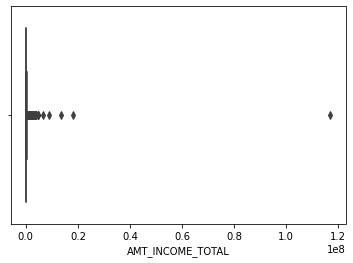

In [43]:
# visualize income column with boxplot
sns.boxplot(data= app_df_2, x = 'AMT_INCOME_TOTAL')
plt.show()

In [44]:
# the highest income 117000000 may be human error input
# remove outliers with values >= 99%
app_df_3 = app_df_2[app_df_2['AMT_INCOME_TOTAL'] < 472500]

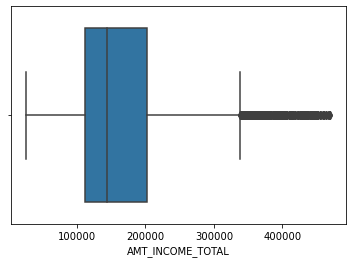

In [45]:
# visualize income column with boxplot again
sns.boxplot(data= app_df_3, x = 'AMT_INCOME_TOTAL')
plt.show()


#### Handling Outlier - column AMT_CREDIT

In [46]:
# describe the AMT_CREDIT variable
app_df_3.AMT_CREDIT.describe(percentiles=[.25, .50, 0.75, .99,])

count    303140.00
mean     593571.56
std      396188.87
min       45000.00
25%      270000.00
50%      509400.00
75%      808650.00
99%     1800000.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

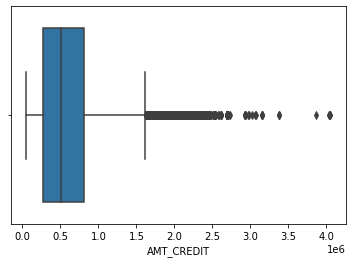

In [47]:
# visualize AMT_CREDIT column with boxplot
sns.boxplot(data= app_df_3, x = 'AMT_CREDIT')
plt.show()

In [48]:
# remove outliers with values > 99%
app_df_3 = app_df_2[app_df_2['AMT_CREDIT'] <= 1800000]

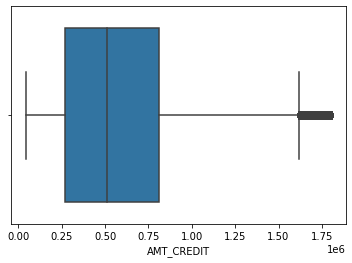

In [49]:
# visualize AMT_CREDIT column with boxplot again
sns.boxplot(data= app_df_3, x = 'AMT_CREDIT')
plt.show()

#### Handling Outlier - column AMT_ANNUITY

In [50]:
# describe the AMT_ANNUITY variable
app_df_3.AMT_ANNUITY.describe(percentiles=[.25, .50, 0.75, .99,])

count   302983.00
mean     26693.30
std      13759.03
min       1615.50
25%      16456.50
50%      24750.00
75%      34177.50
99%      67500.00
max     180000.00
Name: AMT_ANNUITY, dtype: float64

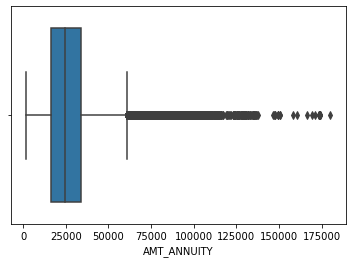

In [51]:
# visualize AMT_ANNUITY column with boxplot
sns.boxplot(data= app_df_3, x = 'AMT_ANNUITY')
plt.show()

## Univariate Analysis

### Categorical unordered univariate analysis

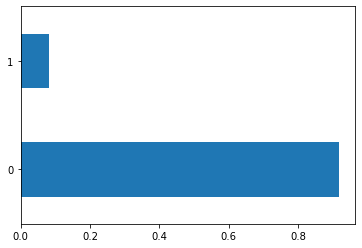

In [52]:
#calculate the percentage of each TARGET customer category. 
app_df_3.TARGET.value_counts(normalize=True).plot.barh()
plt.show()

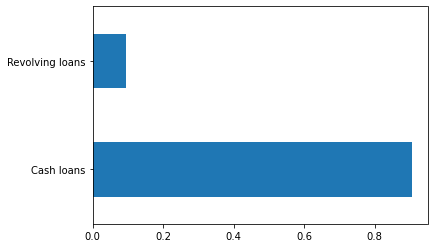

In [53]:
#calculate the percentage of each contract type category. 
app_df_3.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

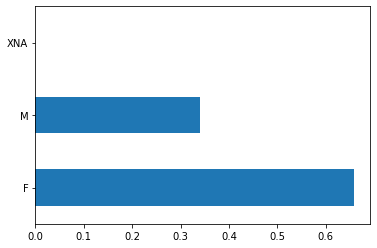

In [54]:
#calculate the percentage of each gender category. 
app_df_3.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()

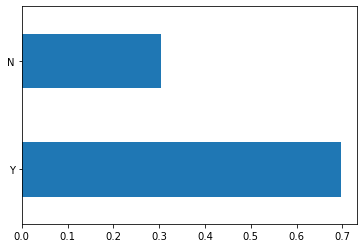

In [55]:
#calculate the percentage of each FLAG_OWN_REALTY column. 
app_df_3.FLAG_OWN_REALTY.value_counts(normalize=True).plot.barh()
plt.show()

In [56]:
# group accompanying client
def group_accompanying (x):
    if x in ['Other_A', 'Other_B', 'Group of people']:
        x = 'Other'
    return x

In [57]:
app_df_3.NAME_TYPE_SUITE = app_df_3.NAME_TYPE_SUITE.apply(group_accompanying)

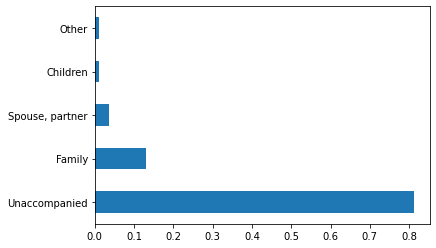

In [58]:
#calculate the percentage of each accompanying client. 
app_df_3.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()
plt.show()

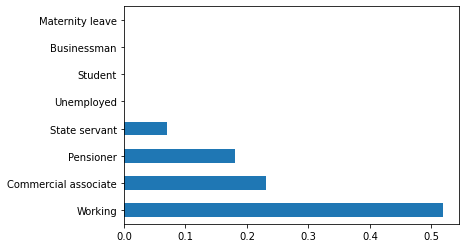

In [59]:
#calculate the percentage of each income type. 
app_df_3.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

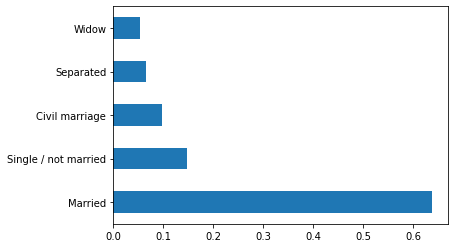

In [60]:
#calculate the percentage of each family status. 
app_df_3.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.show()

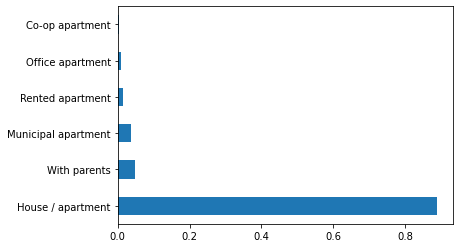

In [61]:
#calculate the percentage of each house type. 
app_df_3.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

### Categorical ordered univariate analysis

In [62]:
# define a function to classify income varible in 7 groups
def segment_income(x):
    if x < 50000:
        return '< 50k'
    elif x >= 50000 and x <= 100000:
        return '50-100k'
    elif x >= 100000 and x <= 150000:
        return '100-150k'
    elif x > 150000 and x <= 200000:
        return '150-200k'
    elif x > 200000 and x <= 250000:
        return '200-250k'
    elif x > 250000 and x <= 300000:
        return '250-300k'
    elif x > 300000:
        return '>300k'
# apply function
app_df_3['income_group'] = app_df_3.AMT_INCOME_TOTAL.apply(segment_income)
app_df_3['income_group'].value_counts(normalize=True)


100-150k   0.30
150-200k   0.21
50-100k    0.19
200-250k   0.16
>300k      0.07
250-300k   0.05
< 50k      0.01
Name: income_group, dtype: float64

In [63]:
app_df_3['income_group'].value_counts(normalize=True)

100-150k   0.30
150-200k   0.21
50-100k    0.19
200-250k   0.16
>300k      0.07
250-300k   0.05
< 50k      0.01
Name: income_group, dtype: float64

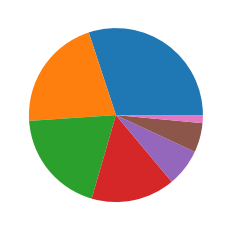

In [64]:
# plot the boxplot of income variable
plt.pie(app_df_3['income_group'].value_counts(normalize=True), )
plt.show()

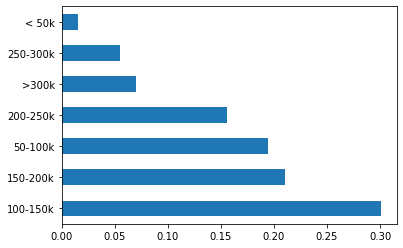

In [65]:
#calculate the percentage of each CNT_CHILDREN column. 
app_df_3.income_group.value_counts(normalize=True).plot.barh()
plt.show()

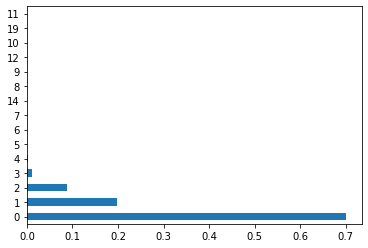

In [66]:
#calculate the percentage of each CNT_CHILDREN column. 
app_df_3.CNT_CHILDREN.value_counts(normalize=True).plot.barh()
plt.show()

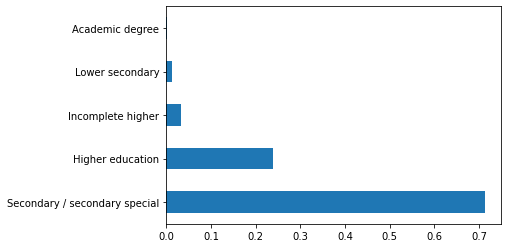

In [67]:
#calculate the percentage of each education category. 
app_df_3.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

In [68]:
# add age of customer column

In [69]:
import math

In [70]:
# define round floor of age
def math_floor(x):
    x = int(x)
    x = math.floor(x)
    return x

In [71]:
app_df_3['age'] = pd.to_numeric(app_df_3.DAYS_BIRTH/365*(-1)).apply(math_floor)

In [72]:
# define age group
def age_group(x):
    if x < 18:
        return 'Under 18'
    elif x >= 18 and x <= 25:
        return '18-25'
    elif x >= 26 and x <= 35:
        return '26-35'
    elif x >= 36 and x <= 45:
        return '36-45'
    elif x > 45:
        return '>45'

In [73]:
app_df_3['age_group'] = app_df_3['age'].apply(age_group)

In [74]:
# check new age column 
app_df_3['age_group'].value_counts()

>45      129656
36-45     82338
26-35     74828
18-25     16161
Name: age_group, dtype: int64

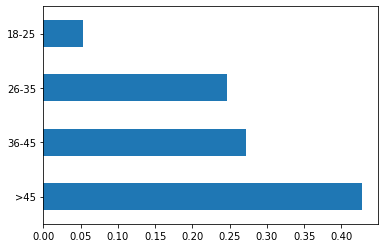

In [75]:
app_df_3.age_group.value_counts(normalize=True).plot.barh()
plt.show()

In [76]:
# add working experience years from column DAYS_EMPLOYED
app_df_3['exp_year'] = pd.to_numeric(app_df_3.DAYS_EMPLOYED/365*(-1))


In [77]:
# define function to group working year group
def exp_year_group(x):
    if x < 1:
        return '<1'
    elif x >= 1 and x < 2:
        return '1-2'
    elif x >= 2 and x < 5:
        return '2-5'
    elif x >= 5 and x < 10:
        return '5-10'
    elif x >= 10 and x < 20:
        return '10-20'
    elif x >= 20:
        return '>20'

In [78]:
app_df_3['exp_year_group'] = app_df_3['exp_year'].apply(exp_year_group)

In [79]:
app_df_3['exp_year_group'].value_counts()

<1       82240
2-5      75429
5-10     63853
10-20    37721
1-2      31418
>20      12322
Name: exp_year_group, dtype: int64

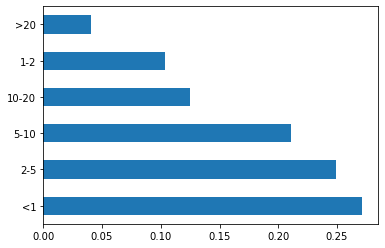

In [80]:
#calculate the percentage of each CNT_CHILDREN column. 
app_df_3.exp_year_group.value_counts(normalize=True).plot.barh()
plt.show()

## Data analysis

1. Analyze the behavior of customer
2. Understand customer demand on loan
3. Analyze the risk of difficulty customer
4. Find the solution and recommendation for BOD


### Bivariate analysis

#### Numerical- Categorical analysis

##### income and difficulty paying their installments

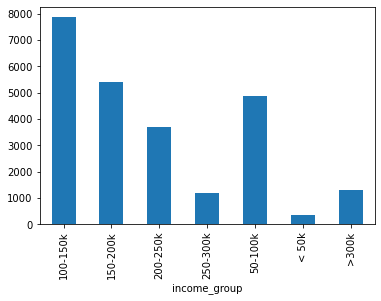

In [81]:
#plot the box plot of income and target variable
app_df_3.groupby(['income_group'])['TARGET'].sum().plot.bar()
plt.show()

##### loan annuity and difficulty paying their installments

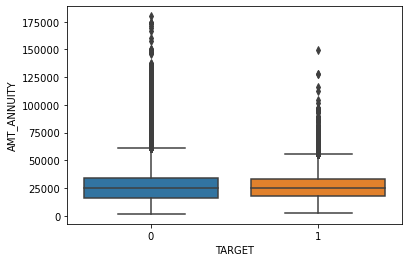

In [82]:
#plot the box plot of loan annuity and target variable
sns.boxplot(data=app_df_3, x = 'TARGET', y = 'AMT_ANNUITY')
plt.show()

####  Categorical categorical bivariate analysis

##### Number of application with difficulty in paying the installment

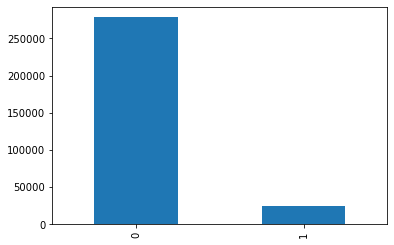

In [83]:
app_df_3['TARGET'].value_counts().plot.bar()
plt.show()

In [84]:
app_df_3['TARGET'].value_counts()

0    278361
1     24622
Name: TARGET, dtype: int64

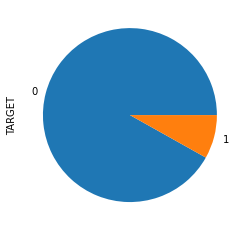

In [85]:
app_df_3['TARGET'].value_counts(normalize=True).plot.pie()
plt.show()

##### age group and difficulty paying their installments

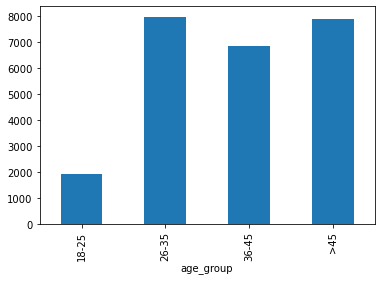

In [86]:
app_df_3.groupby(['age_group'])['TARGET'].sum().plot.bar()
plt.show()

##### contract type and difficulty

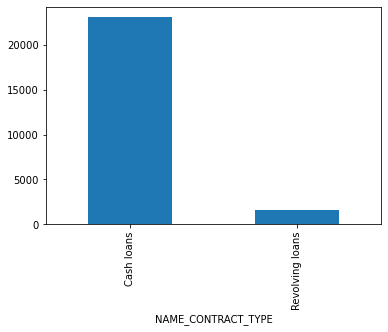

In [87]:
app_df_3.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].sum().plot.bar()
plt.show()

##### gender and difficulty

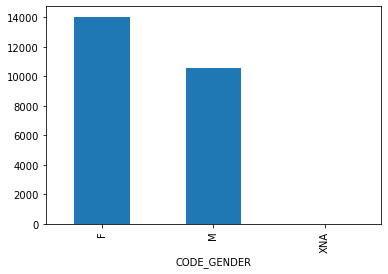

In [88]:
app_df_3.groupby(['CODE_GENDER'])['TARGET'].sum().plot.bar()
plt.show()

##### education and difficulty paying their installments

In [89]:
app_df_3.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].sum()

NAME_EDUCATION_TYPE
Academic degree                      3
Higher education                  3923
Incomplete higher                  864
Lower secondary                    417
Secondary / secondary special    19415
Name: TARGET, dtype: int64

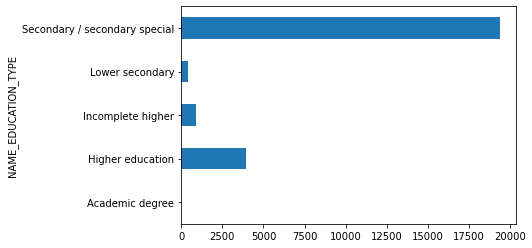

In [90]:
app_df_3.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].sum().plot.barh()
plt.show()

##### number of children and difficulty paying their installments

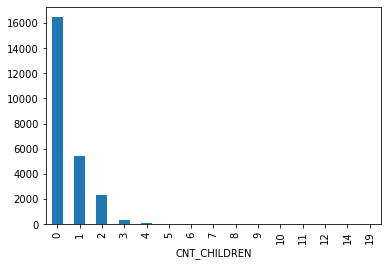

In [91]:
app_df_3.groupby(['CNT_CHILDREN'])['TARGET'].sum().plot.bar()
plt.show()

##### own car and difficulty paying their installments

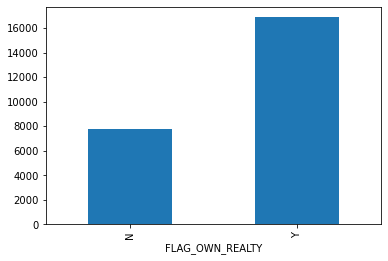

In [92]:
app_df_3.groupby(['FLAG_OWN_REALTY'])['TARGET'].sum().plot.bar()
plt.show()

##### job and difficulty paying their installments

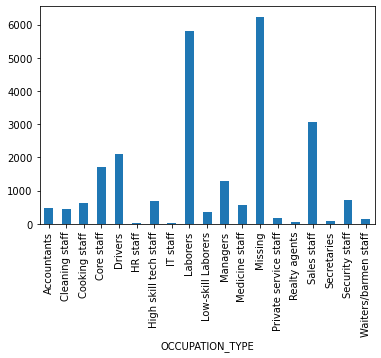

In [93]:
app_df_3.groupby(['OCCUPATION_TYPE'])['TARGET'].sum().plot.bar()
plt.show()

##### working experience and difficulty paying their installments

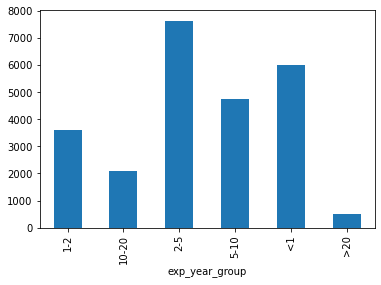

In [94]:
app_df_3.groupby(['exp_year_group'])['TARGET'].sum().plot.bar()
plt.show()

##### apply_time and difficulty paying their installments

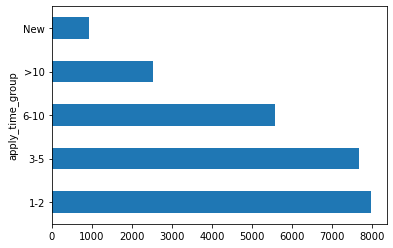

In [95]:
app_df_3.groupby(['apply_time_group'])['TARGET'].sum().plot.barh()
plt.show()

##### accommodation type and difficulty paying their installments

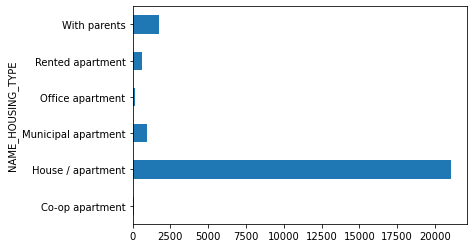

In [96]:
app_df_3.groupby(['NAME_HOUSING_TYPE'])['TARGET'].sum().plot.barh()
plt.show()

##### family status and difficulty paying their installments

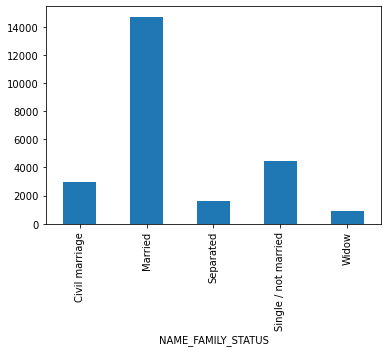

In [97]:
app_df_3.groupby(['NAME_FAMILY_STATUS'])['TARGET'].sum().plot.bar()
plt.show()

##### income type and difficulty paying their installments

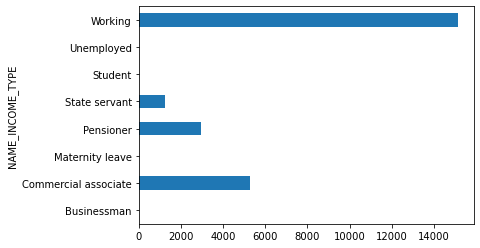

In [98]:
app_df_3.groupby(['NAME_INCOME_TYPE'])['TARGET'].sum().plot.barh()
plt.show()

#### Multivariate analysis

This analysis is to identify patterns which indicate if a client has difficulty paying their installments.


##### age group, education and difficulty paying their installments

In [99]:
cal_1 = pd.pivot_table(app_df_3, 
                       values= 'TARGET',
                       index='age_group',
                       columns='NAME_EDUCATION_TYPE',
                       aggfunc='sum')
cal_1

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
age_group,,,,,
18-25,0,268,199,24,1418
26-35,3,1522,422,122,5911
36-45,0,1017,153,118,5546
>45,0,1116,90,153,6540


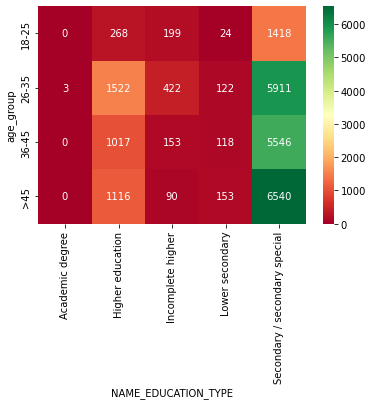

In [100]:
sns.heatmap(cal_1, annot=True, cmap='RdYlGn', fmt='g')
plt.show()

##### working experience group, avg income and difficulty paying their installments

In [101]:
cal_1 = pd.pivot_table(app_df_3, 
                       values= 'TARGET',
                       index='exp_year_group',
                       columns='income_group',
                       aggfunc='sum')
cal_1

income_group,100-150k,150-200k,200-250k,250-300k,50-100k,< 50k,>300k
exp_year_group,,,,,,,
1-2,1225,798,557,158,670,21,175
10-20,624,479,365,107,345,23,151
2-5,2441,1733,1156,387,1429,65,428
5-10,1417,1103,816,273,794,44,300
<1,1986,1185,710,220,1508,186,221
>20,169,105,78,28,118,2,22


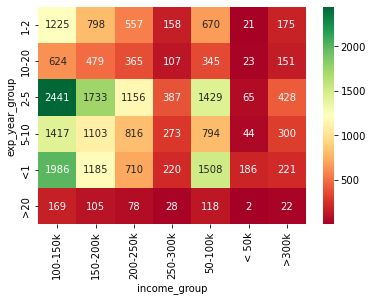

In [102]:
sns.heatmap(cal_1, annot=True, cmap='RdYlGn', fmt='g')
plt.show()

##### working experience group, gender and difficulty paying their installments

In [103]:
cal_1 = pd.pivot_table(app_df_3, 
                       values= 'TARGET',
                       index='exp_year_group',
                       columns='CODE_GENDER',
                       aggfunc='sum'
                      )
cal_1

CODE_GENDER,F,M,XNA
exp_year_group,,,
1-2,1824.00,1780.00,NaN
10-20,1243.00,851.00,NaN
2-5,4062.00,3577.00,0.00
5-10,2768.00,1979.00,0.00
<1,3764.00,2252.00,NaN
>20,381.00,141.00,0.00


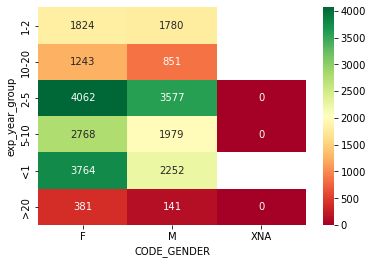

In [104]:
sns.heatmap(cal_1, annot=True,cmap='RdYlGn', fmt='g')
plt.show()

##### working experience group, job and difficulty paying their installments

In [105]:
cal_1 = pd.pivot_table(app_df_3, 
                       values= 'TARGET',
                       index='OCCUPATION_TYPE',
                       columns='exp_year_group',
                       aggfunc='sum'
                      )
# cal_1

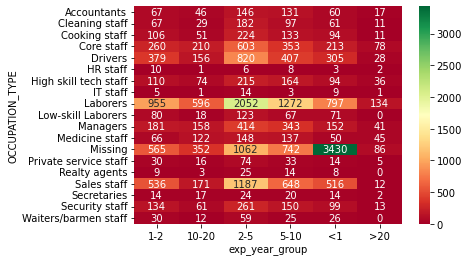

In [106]:
sns.heatmap(cal_1, annot=True,cmap='RdYlGn', fmt='g')
plt.show()

##### job, family status and difficulty paying their installments

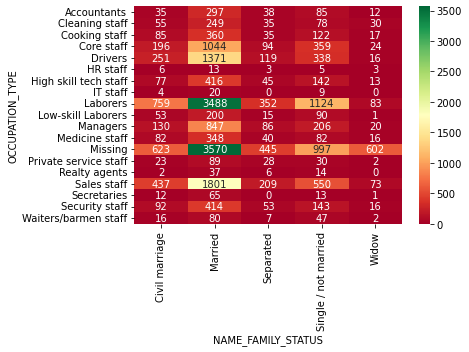

In [107]:
cal_1 = pd.pivot_table(app_df_3, 
                       values= 'TARGET',
                       index='OCCUPATION_TYPE',
                       columns='NAME_FAMILY_STATUS',
                       aggfunc='sum'
                      )
sns.heatmap(cal_1, annot=True,cmap='RdYlGn', fmt='g')
plt.show()

##### job, number of children and difficulty paying their installments

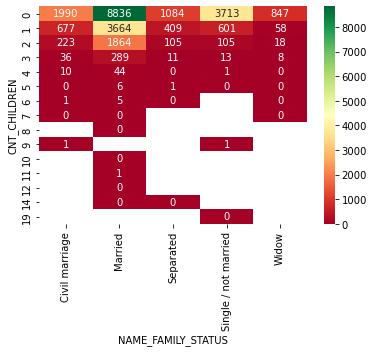

In [108]:
cal_1 = pd.pivot_table(app_df_3, 
                       values= 'TARGET',
                       index='CNT_CHILDREN',
                       columns='NAME_FAMILY_STATUS',
                       aggfunc='sum'
                      )
sns.heatmap(cal_1, annot=True,cmap='RdYlGn', fmt='g')
plt.show()

##### job, number of people in family and difficulty paying their installments

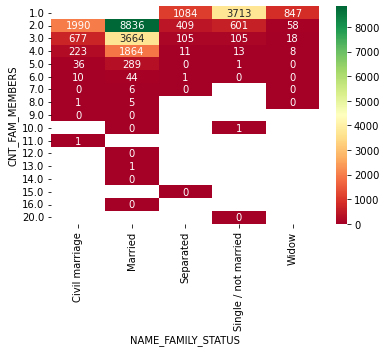

In [109]:
cal_1 = pd.pivot_table(app_df_3, 
                       values= 'TARGET',
                       index='CNT_FAM_MEMBERS',
                       columns='NAME_FAMILY_STATUS',
                       aggfunc='sum'
                      )
sns.heatmap(cal_1, annot=True,cmap='RdYlGn', fmt='g')
plt.show()

##### job, education and difficulty paying their installments

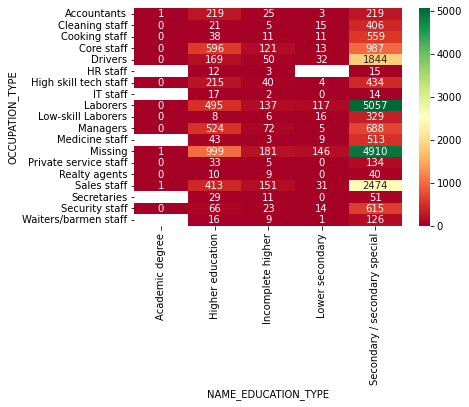

In [110]:
cal_1 = pd.pivot_table(app_df_3, 
                       values= 'TARGET',
                       index='OCCUPATION_TYPE',
                       columns='NAME_EDUCATION_TYPE',
                       aggfunc='sum'
                      )
sns.heatmap(cal_1, annot=True,cmap='RdYlGn', fmt='g')
plt.show()

##### job, job group and difficulty paying their installments

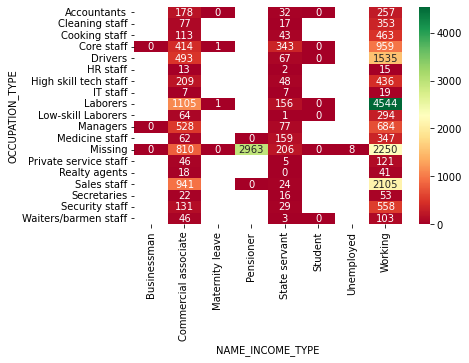

In [111]:
cal_1 = pd.pivot_table(app_df_3, 
                       values= 'TARGET',
                       index='OCCUPATION_TYPE',
                       columns='NAME_INCOME_TYPE',
                       aggfunc='sum'
                      )
sns.heatmap(cal_1, annot=True,cmap='RdYlGn', fmt='g')
plt.show()

##### job, company type and difficulty paying their installments

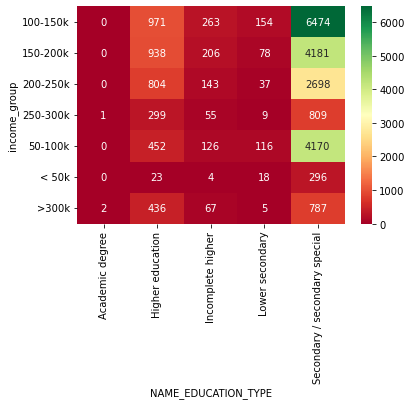

In [112]:
cal_1 = pd.pivot_table(app_df_3, 
                       values= 'TARGET',
                       index='income_group',
                       columns='NAME_EDUCATION_TYPE',
                       aggfunc='sum'
                      )
sns.heatmap(cal_1, annot=True,cmap='RdYlGn', fmt='g')
plt.show()

In [113]:
cal_1

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
income_group,,,,,
100-150k,0,971,263,154,6474
150-200k,0,938,206,78,4181
200-250k,0,804,143,37,2698
250-300k,1,299,55,9,809
50-100k,0,452,126,116,4170
< 50k,0,23,4,18,296
>300k,2,436,67,5,787
